In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [30]:
dataset = pd.read_csv("Student Data.csv", skiprows = 23, na_values = '?')

In [31]:
dataset.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1


In [32]:
dataset.shape

(1437, 15)

In [33]:
dataset.columns=["First Term Gpa","Second Term Gpa","First Languagec","Funding","School","FastTrack","Coop","Residency","Gender","Previous Education","Age Group","High School Average Mark","Math Score","English Grade","FirstYearPersistence"]

In [34]:
dataset.head()

,First Term Gpa,Second Term Gpa,First Languagec,Funding,School,FastTrack,Coop,Residency,Gender,Previous Education,Age Group,High School Average Mark,Math Score,English Grade,FirstYearPersistence
0,0.000000,0.000000,1.0,2,6,2,1,1,2,1.0,1.0,59.0,16.0,7.0,1
1,2.500000,2.000000,3.0,4,6,1,2,2,2,1.0,3.0,NaN,NaN,7.0,1
2,4.250000,3.923077,1.0,1,6,2,1,1,1,2.0,3.0,92.0,41.0,9.0,1
3,3.020833,2.321429,3.0,4,6,1,2,2,2,2.0,3.0,NaN,NaN,8.0,1
4,4.275000,4.326923,1.0,2,6,1,1,1,1,2.0,3.0,97.0,NaN,9.0,1


In [35]:
dataset.isnull().sum()

First Term Gpa               17
Second Term Gpa             160
First Languagec             111
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous Education            4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

In [36]:
dataset['School'].value_counts()

School
6    1437
Name: count, dtype: int64

In [37]:
def impute_First_gpa(row):
    if pd.isnull(row['First Term Gpa']):
        school = row['School']
        avg_gpa = dataset.loc[dataset['School'] == school, 'First Term Gpa'].mean()
        return avg_gpa
    else:
        return row['First Term Gpa']

dataset['First Term Gpa'] = dataset.apply(impute_First_gpa, axis=1)


In [38]:
def impute_Second_gpa(row):
    if pd.isnull(row['Second Term Gpa']):
        school = row['School']
        avg_gpa = dataset.loc[dataset['School'] == school, 'Second Term Gpa'].mean()
        return avg_gpa
    else:
        return row['Second Term Gpa']

dataset['Second Term Gpa'] = dataset.apply(impute_Second_gpa, axis=1)


In [39]:
lang_mode=dataset['First Languagec'].mode()[0]

In [40]:
dataset['First Languagec']=dataset['First Languagec'].fillna(lang_mode)

In [41]:
dataset.isnull().sum()

First Term Gpa                0
Second Term Gpa               0
First Languagec               0
Funding                       0
School                        0
FastTrack                     0
Coop                          0
Residency                     0
Gender                        0
Previous Education            4
Age Group                     4
High School Average Mark    743
Math Score                  462
English Grade                45
FirstYearPersistence          0
dtype: int64

In [42]:
dataset = dataset.dropna(subset=['Previous Education'])

In [43]:
dataset['Math Score']=dataset['Math Score'].fillna(dataset['Math Score'].mean())

In [44]:
dataset['English Grade']=dataset['English Grade'].fillna(dataset['English Grade'].mean())

In [45]:
dataset.drop(columns='High School Average Mark',inplace=True)

In [46]:
dataset.isnull().sum()

First Term Gpa          0
Second Term Gpa         0
First Languagec         0
Funding                 0
School                  0
FastTrack               0
Coop                    0
Residency               0
Gender                  0
Previous Education      0
Age Group               0
Math Score              0
English Grade           0
FirstYearPersistence    0
dtype: int64

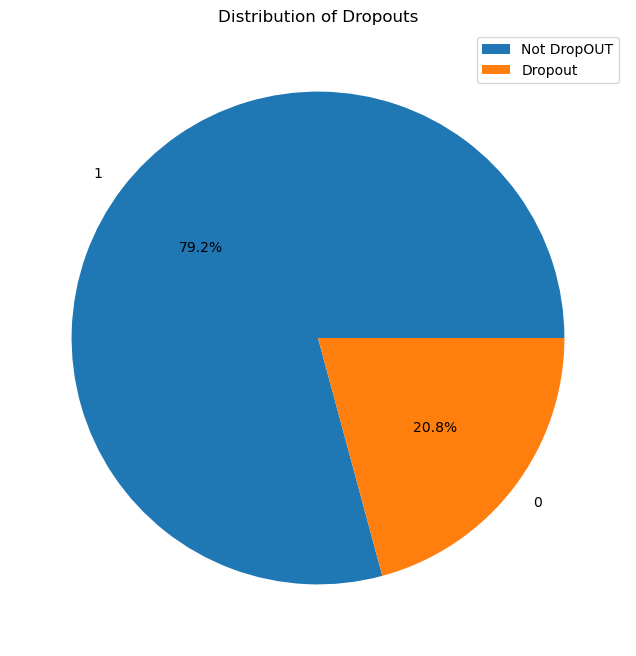

In [47]:
value_counts = dataset['FirstYearPersistence'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
plt.legend(['Not DropOUT','Dropout'])
plt.title('Distribution of Dropouts')
plt.show()

<Axes: xlabel='First Term Gpa', ylabel='Second Term Gpa'>

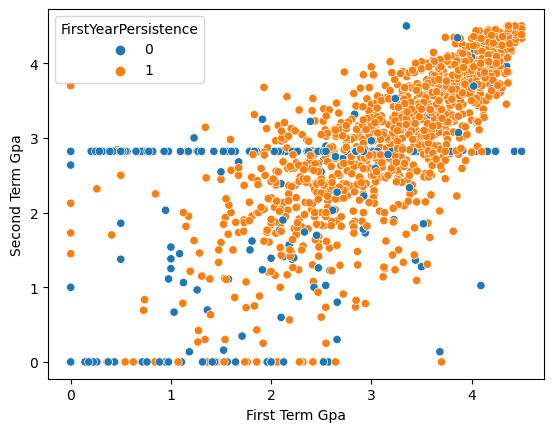

In [48]:
sns.scatterplot(dataset,x='First Term Gpa',y='Second Term Gpa',hue='FirstYearPersistence')

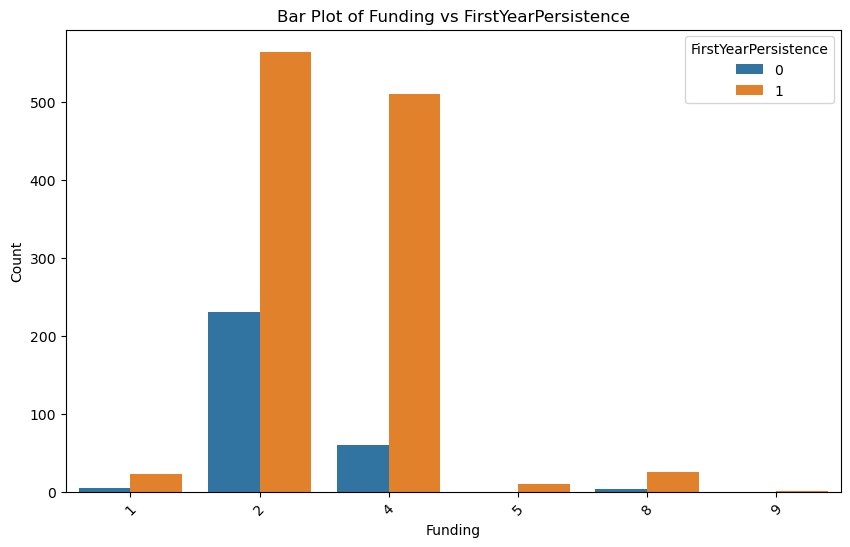

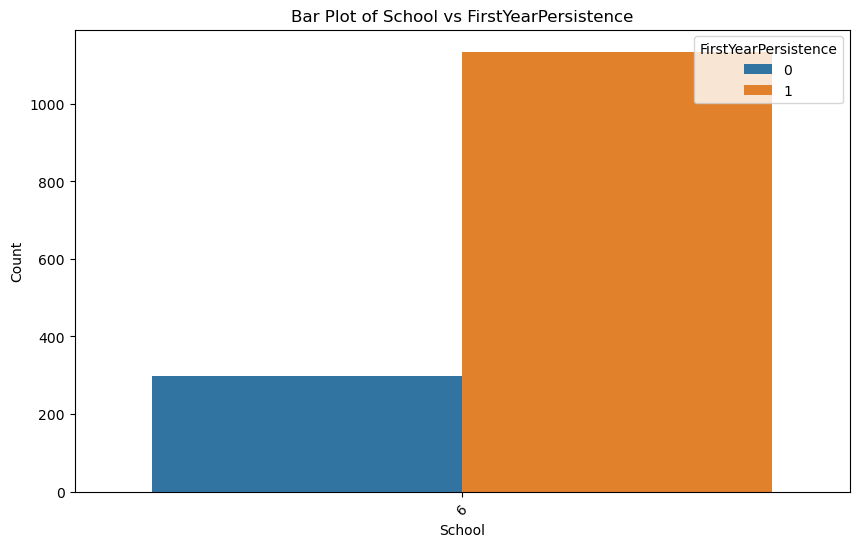

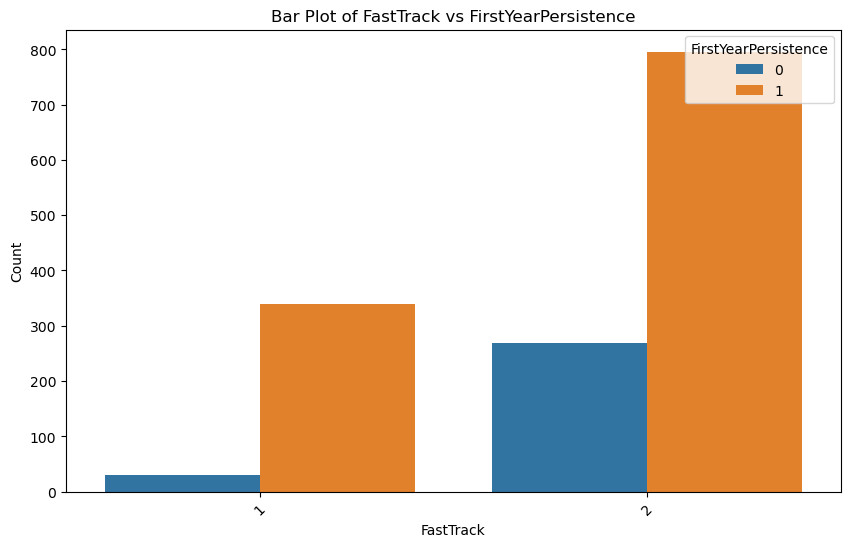

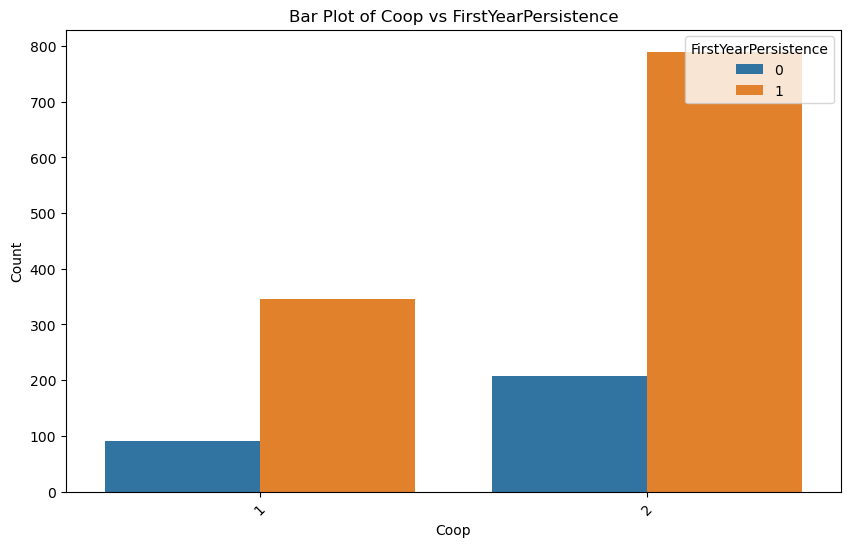

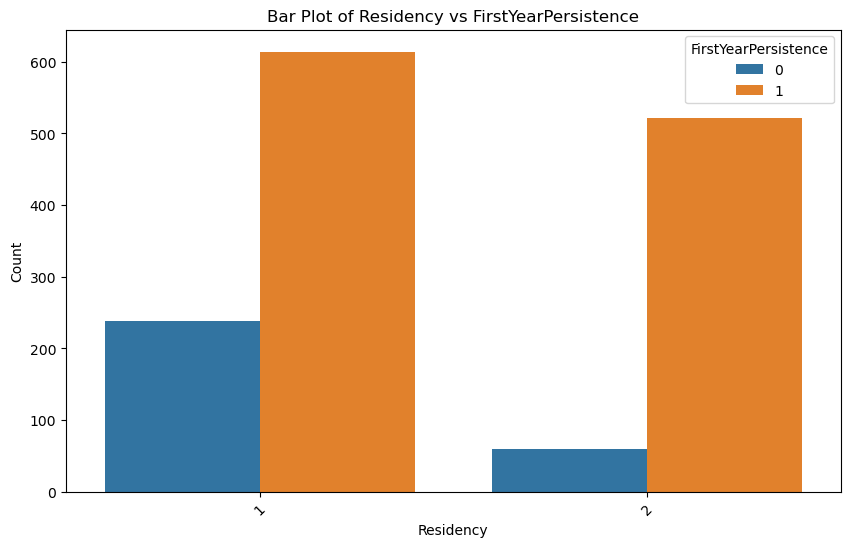

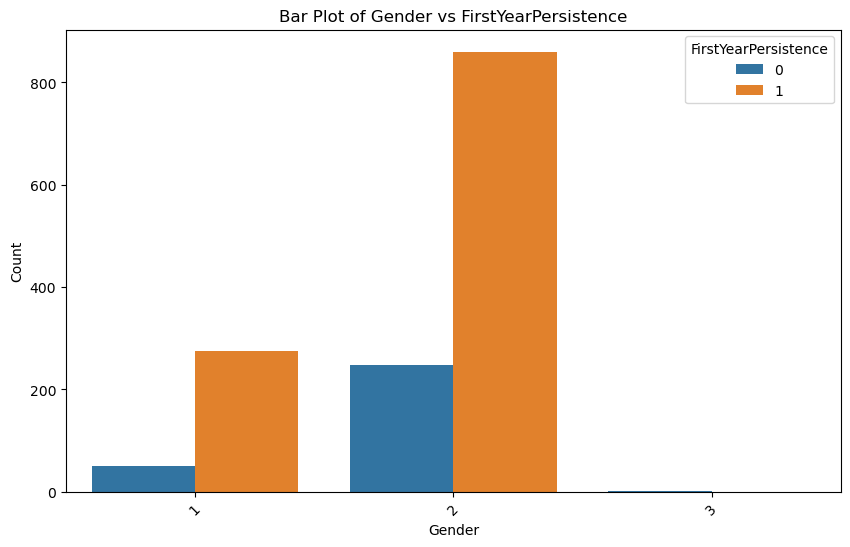

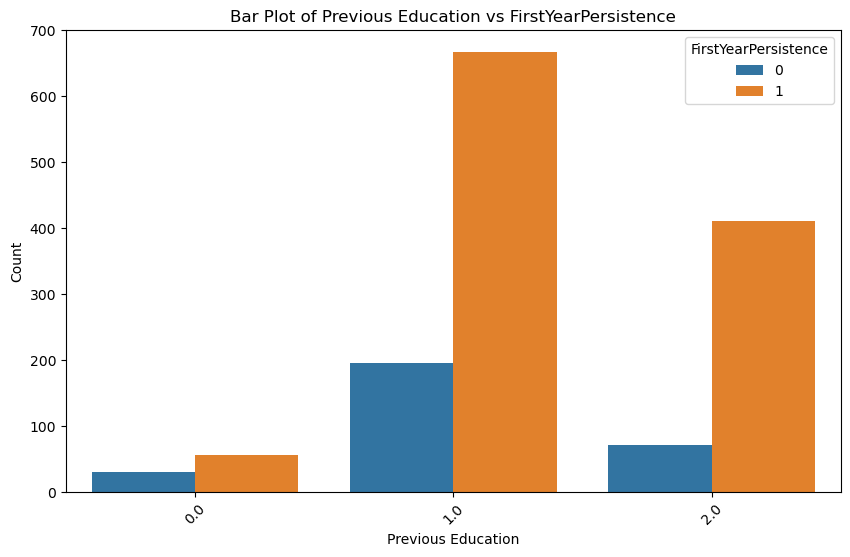

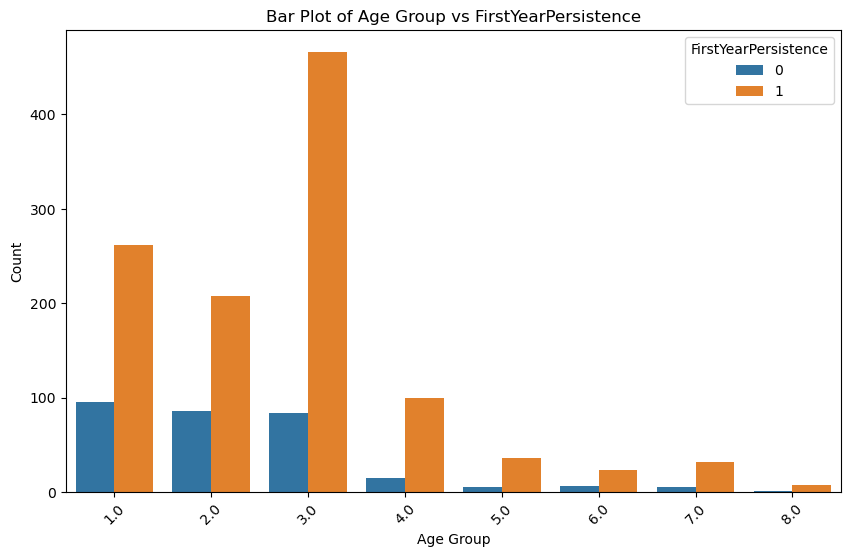

In [49]:
categorical_vars = ["Funding", "School", "FastTrack", "Coop", "Residency", "Gender", "Previous Education", "Age Group"]

for cat_var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=cat_var, hue="FirstYearPersistence", data=dataset)
    plt.title(f'Bar Plot of {cat_var} vs FirstYearPersistence')
    plt.xlabel(cat_var)
    plt.ylabel('Count')
    plt.legend(title='FirstYearPersistence', loc='upper right')
    plt.xticks(rotation=45)
    plt.show()

In [50]:
dataset.drop(columns='School',inplace=True)

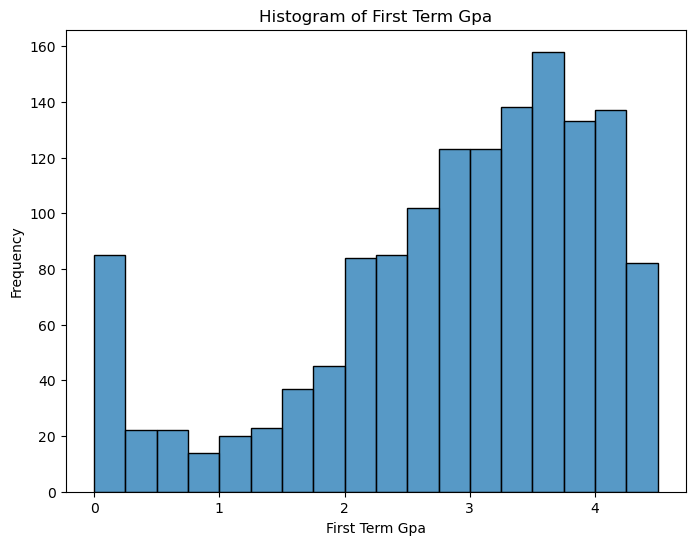

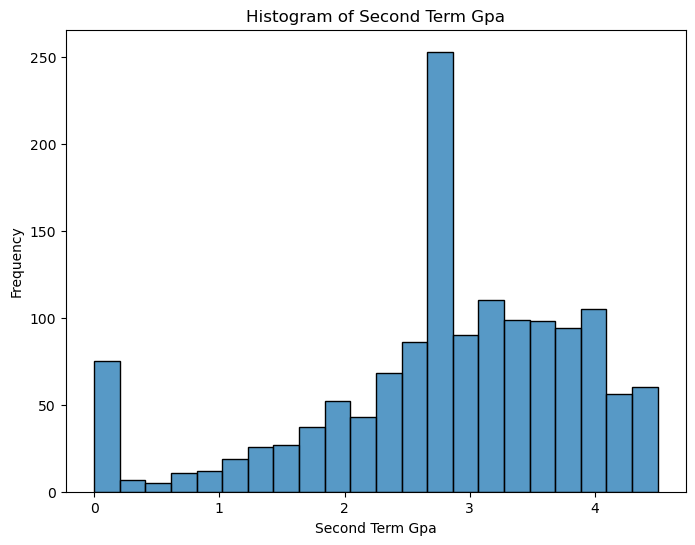

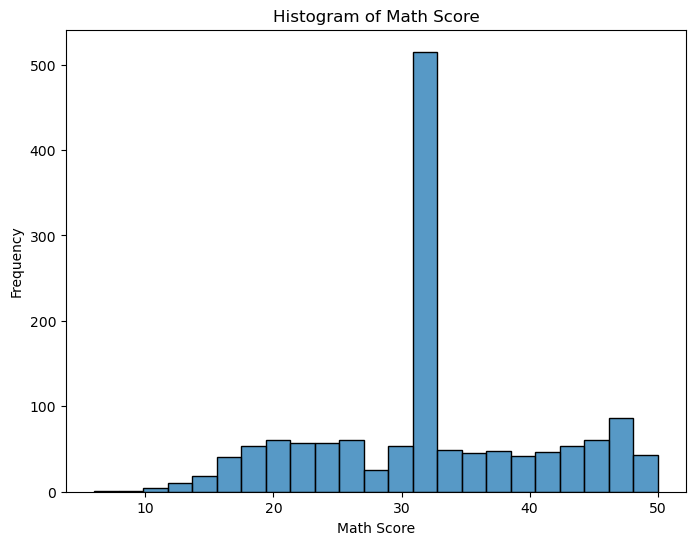

In [51]:
continuous_vars = ["First Term Gpa", "Second Term Gpa", "Math Score"]

for cont_var in continuous_vars:
    plt.figure(figsize=(8, 6))
    sns.histplot(dataset[cont_var])
    plt.title(f'Histogram of {cont_var}')
    plt.xlabel(cont_var)
    plt.ylabel('Frequency')
    plt.show()


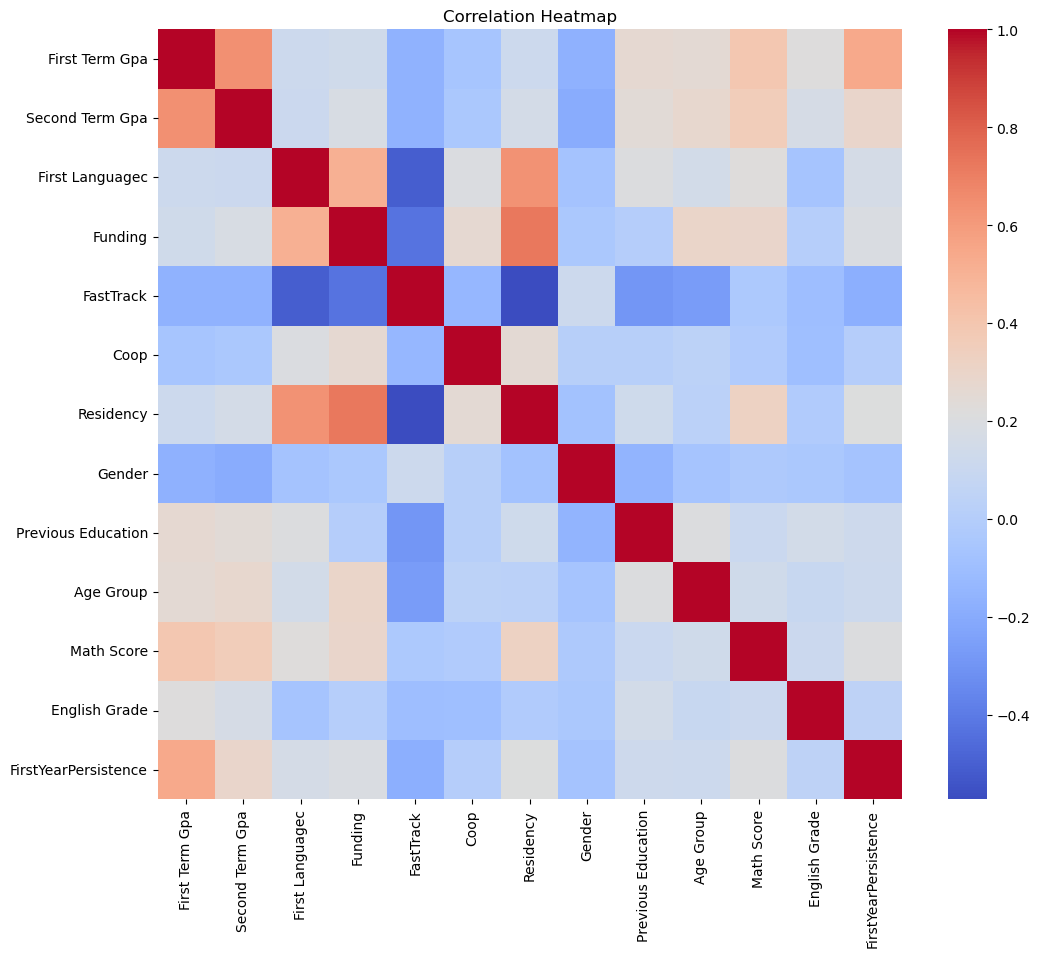

In [52]:
correlation_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [53]:
dataset.columns

Index(['First Term Gpa', 'Second Term Gpa', 'First Languagec', 'Funding',
       'FastTrack', 'Coop', 'Residency', 'Gender', 'Previous Education',
       'Age Group', 'Math Score', 'English Grade', 'FirstYearPersistence'],
      dtype='object')

In [54]:
X=dataset.drop(columns='FirstYearPersistence')
y=dataset['FirstYearPersistence']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [57]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  
])

In [58]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [59]:
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
33/33 [==============================] - 1s 9ms/step - loss: 0.5547 - accuracy: 0.7439 - val_loss: 0.4610 - val_accuracy: 0.7739
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 0.4161 - accuracy: 0.8050 - val_loss: 0.4016 - val_accuracy: 0.8348
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3805 - accuracy: 0.8409 - val_loss: 0.3790 - val_accuracy: 0.8696
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3647 - accuracy: 0.8545 - val_loss: 0.3695 - val_accuracy: 0.8783
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3513 - accuracy: 0.8574 - val_loss: 0.3624 - val_accuracy: 0.8696
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8584 - val_loss: 0.3576 - val_accuracy: 0.8696
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3366 - accuracy: 0.8671 - val_loss: 0.3561 - val_accuracy: 0.8609
Epoch 8/50
33/33 [==

In [77]:
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {test_accuracy}')

9/9 [==============================] - 0s 2ms/step - loss: 0.3793 - accuracy: 0.8606
Test Accuracy: 0.8606271743774414


In [78]:
dataset.columns

Index(['First Term Gpa', 'Second Term Gpa', 'First Languagec', 'Funding',
       'FastTrack', 'Coop', 'Residency', 'Gender', 'Previous Education',
       'Age Group', 'Math Score', 'English Grade', 'FirstYearPersistence'],
      dtype='object')

In [69]:
import pickle

file = open('neural_network1.pkl','wb')

In [70]:
pickle.dump(model,file)

In [67]:
# model = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)
# model.fit(X_train_scaled, y_train)

C:\Users\91951\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=500)

In [72]:
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
#     Dense(32, activation='relu'),
#     Dense(1, activation='sigmoid')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.1)

# # Dump the model using pickle
# with open('neural_network_model11.pkl', 'wb') as file:
#     pickle.dump(model, file)

Epoch 1/50
33/33 [==============================] - 1s 7ms/step - loss: 0.5594 - accuracy: 0.7449 - val_loss: 0.4801 - val_accuracy: 0.7739
Epoch 2/50
33/33 [==============================] - 0s 3ms/step - loss: 0.4318 - accuracy: 0.8050 - val_loss: 0.4216 - val_accuracy: 0.8261
Epoch 3/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3965 - accuracy: 0.8312 - val_loss: 0.3965 - val_accuracy: 0.8696
Epoch 4/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3764 - accuracy: 0.8341 - val_loss: 0.3856 - val_accuracy: 0.8696
Epoch 5/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3590 - accuracy: 0.8448 - val_loss: 0.3822 - val_accuracy: 0.8696
Epoch 6/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3457 - accuracy: 0.8545 - val_loss: 0.3770 - val_accuracy: 0.8609
Epoch 7/50
33/33 [==============================] - 0s 3ms/step - loss: 0.3392 - accuracy: 0.8584 - val_loss: 0.3736 - val_accuracy: 0.8609
Epoch 8/50
33/33 [==

In [73]:
# !pip install pickle

ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle


In [75]:
# modelas=LogisticRegression()

In [76]:
# modelas.fit(X_train_scaled, y_train)

LogisticRegression()

In [79]:
# with open('logis_l11.pkl', 'wb') as file:
#     pickle.dump(model, file)